In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.integrate import solve_ivp, odeint

In [2]:
a_bar = 0.56 # coalbedo averaged between ice and ocean
delta_a = 0.48 # difference in coalbedo between ice and ocean
h_alpha = 0.5 # smoothness of albedo transition (m)
B = 2.83 # dependence of net surface flux on surface temperature (W/m^2/K)
Fb = 0 # upward heat flux into bottom
Sm = 100. # downward shortwave annual-mean (W/m^2)
Sa = 150. # downward shortwave seasonal amplitude (W/m^2)
Lm = 70. # reference longwave annual-mean (W/m^2)
La = 41. # reference longwave seasonal amplitude (W/m^2)
P = 1. # forcing period (yrs)
phi = 0.15 # time between summer solstice and peak of longwave forcing (yrs)
coHo = 6.3 # heat capacity of ocean mixed layer (W/m^2 yr/K) (equivalent to 2e8 J/m^2/K)
Li = 9.5 # sea ice latent heat of fusion (W/m^3 yr) (equivalent to 3e8 J/m^3)
zeta = 0.7 # sea ice thermodynamic scale thickness zeta=ki/B (m)
yr2sec = 3.154e7

In [3]:
def entropy_tend(t,E, X=0., h_alpha=0.5):
    A_star = ( a_bar+delta_a/2.*np.tanh(E/ (Li*h_alpha) ) ) * ( Sm-Sa*np.cos(2.*np.pi*t/P) ) - ( Lm+La*np.cos(2*np.pi*(t/P-phi/P)) )
    if E>=0:                    #open ocean condition
        h_i = 0.
        T=E/coHo
    elif (E<0) & (A_star > 0): #"melting" condition
        h_i = E/-Li
        T=0.
    elif (E<0) & (A_star < 0): #"freezing" condition
        h_i = E/-Li
        T= (A_star/B) * (1./(1.+zeta/h_i))
    dEdt = A_star-(B*T)+Fb+X 
    return dEdt

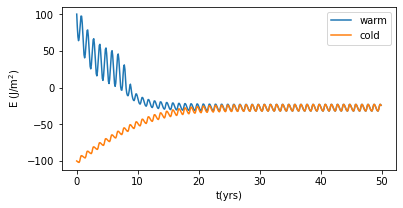

In [4]:
t=np.arange(0,50,0.1) #yrs

sol_warm = odeint(entropy_tend, t = t, y0=100., args=(0.,0.5), tfirst=True)
sol_cold = odeint(entropy_tend, t = t, y0=-100.,args=(0.,0.5), tfirst=True)

fig,ax = plt.subplots(figsize=(6,3))
plt.plot(t, sol_warm, label = 'warm')
plt.plot(t, sol_cold, label = 'cold')
plt.xlabel('t(yrs)')
plt.ylabel('E (J/m$^2$)')
plt.legend()
plt.show()

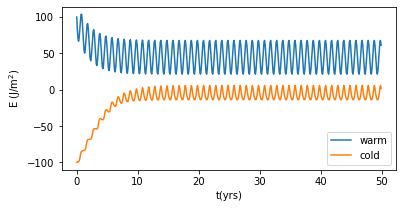

In [5]:
sol_warm = odeint(entropy_tend, t = t, y0=100., args=(10.,0.5), tfirst=True)
sol_cold = odeint(entropy_tend, t = t, y0=-100.,args=(10.,0.5), tfirst=True)

fig,ax = plt.subplots(figsize=(6,3))
plt.plot(t, sol_warm, label = 'warm')
plt.plot(t, sol_cold, label = 'cold')
plt.xlabel('t(yrs)')
plt.ylabel('E (J/m$^2$)')
plt.legend()
plt.show()

In [6]:
def findconv(soln):
    #search through last 20 percent of timesteps or so, where we should have converged
    idx = int(0.2*len(soln))
    Es=np.max(soln[-idx:])
    Ew=np.min(soln[-idx:])
    return (Es,Ew)

# h$_\alpha$ = 0.5

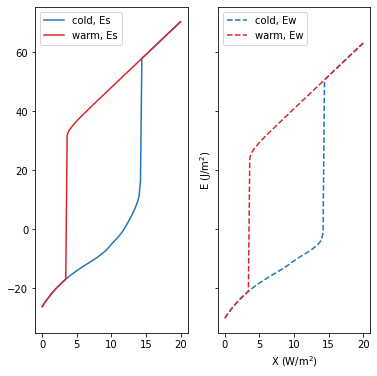

In [7]:
Xs= np.linspace(0,20,101)
t=np.arange(0,50,0.5)
cold_sln = np.empty((Xs.shape[0],2))
warm_sln = np.empty((Xs.shape[0],2))
for ii,X in enumerate(Xs):
    cold_sln[ii]=(findconv(odeint(entropy_tend, t = t, y0=-100., args=(X,0.5), tfirst=True)))
    warm_sln[ii]=(findconv(odeint(entropy_tend, t = t, y0=100.,  args=(X,0.5), tfirst=True)))
    
fig,axs = plt.subplots(1,2,figsize=(6,6), sharey=True, sharex=True)

axs[0].plot(Xs, cold_sln[:,0], color = 'tab:blue', label = 'cold, Es')
axs[1].plot(Xs, cold_sln[:,1], color = 'tab:blue', label = 'cold, Ew', linestyle = '--')
axs[0].plot(Xs, warm_sln[:,0], color = 'tab:red', label = 'warm, Es')
axs[1].plot(Xs, warm_sln[:,1], color = 'tab:red', label = 'warm, Ew', linestyle = '--')

plt.xlabel('X (W/m$^2$)')
plt.ylabel('E (J/m$^2$)')
axs[0].legend()
axs[1].legend()
plt.show()

# h$_\alpha$ = 0.05

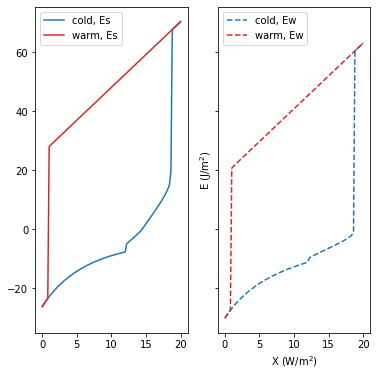

In [8]:
Xs= np.linspace(0,20,101)
t=np.arange(0,50,0.5)
cold_sln = np.empty((Xs.shape[0],2))
warm_sln = np.empty((Xs.shape[0],2))
for ii,X in enumerate(Xs):
    cold_sln[ii]=(findconv(odeint(entropy_tend, t = t, y0=-100., args=(X,0.05), tfirst=True)))
    warm_sln[ii]=(findconv(odeint(entropy_tend, t = t, y0=100.,  args=(X,0.05), tfirst=True)))
    
fig,axs = plt.subplots(1,2,figsize=(6,6), sharey=True, sharex=True)

axs[0].plot(Xs, cold_sln[:,0], color = 'tab:blue', label = 'cold, Es')
axs[1].plot(Xs, cold_sln[:,1], color = 'tab:blue', label = 'cold, Ew', linestyle = '--')
axs[0].plot(Xs, warm_sln[:,0], color = 'tab:red', label = 'warm, Es')
axs[1].plot(Xs, warm_sln[:,1], color = 'tab:red', label = 'warm, Ew', linestyle = '--')

plt.xlabel('X (W/m$^2$)')
plt.ylabel('E (J/m$^2$)')
axs[0].legend()
axs[1].legend()
plt.show()

# h$_\alpha$ = 5.0

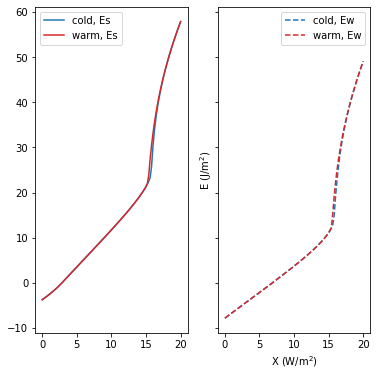

In [9]:
Xs= np.linspace(0,20,101)
t=np.arange(0,50,0.5)
cold_sln = np.empty((Xs.shape[0],2))
warm_sln = np.empty((Xs.shape[0],2))
for ii,X in enumerate(Xs):
    cold_sln[ii]=(findconv(odeint(entropy_tend, t = t, y0=-100., args=(X,5.0), tfirst=True)))
    warm_sln[ii]=(findconv(odeint(entropy_tend, t = t, y0=100.,  args=(X,5.0), tfirst=True)))
    
fig,axs = plt.subplots(1,2,figsize=(6,6), sharey=True, sharex=True)

axs[0].plot(Xs, cold_sln[:,0], color = 'tab:blue', label = 'cold, Es')
axs[1].plot(Xs, cold_sln[:,1], color = 'tab:blue', label = 'cold, Ew', linestyle = '--')
axs[0].plot(Xs, warm_sln[:,0], color = 'tab:red', label = 'warm, Es')
axs[1].plot(Xs, warm_sln[:,1], color = 'tab:red', label = 'warm, Ew', linestyle = '--')

plt.xlabel('X (W/m$^2$)')
plt.ylabel('E (J/m$^2$)')
axs[0].legend()
axs[1].legend()
plt.show()

### As h$_\alpha$ decreases, the non-linearity becomes greater because our sea-ice ocean transition becomes essentially a step function. As h$_\alpha$ increases, we lose the hysteresis loop since we lose the non-linearity.

### Physically, this is significant because it tells us how important the albedo effect of ice can be. If very thin ice acts as a step function (in the case of h$_\alpha \rightarrow 0$) , then young, first year ice can lead to very non-linear behavior in the system. However, if very thick ice is required for the albedo jump, then this non-linearity may exist to a lesser extent.